# Exploring PCA

In [1]:
"""
sources:  
    for the generated data:
    http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
    example of SVD-based PCA
    http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import matplotlib

import numpy as np
import seaborn as sns

In [2]:
#-------------------------------------
# create the data
#-------------------------------------
np.random.seed(1) # random seed for consistency
c1_count = 100
c2_count = 100
total_count = c1_count+c2_count
mu_vec1 = np.array([0.,0.,0.])
cov_mat1 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, c1_count)

mu_vec2 = np.array([1.5,1.5,1.5])
cov_mat2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, c2_count)


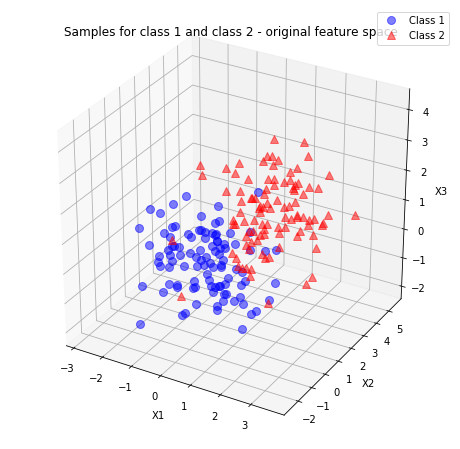

In [3]:
#-------------------------------------
# plot the data
#-------------------------------------
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='Class 1')
ax.plot(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], '^', markersize=8, alpha=0.5, color='red', label='Class 2')

plt.title('Samples for class 1 and class 2 - original feature space')
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('X3')
ax.legend(loc='upper right')

plt.show()

In [4]:
#-------------------------------------
# concatenate all samples
#-------------------------------------
all_samples = np.concatenate((class1_sample, class2_sample), axis=0)
all_labels = np.vstack((np.ones((c1_count,1)),np.ones((c2_count,1))+1))
#print(all_labels)
all_data = np.hstack((all_samples,all_labels))
#print(all_data)



<Figure size 1152x1152 with 0 Axes>

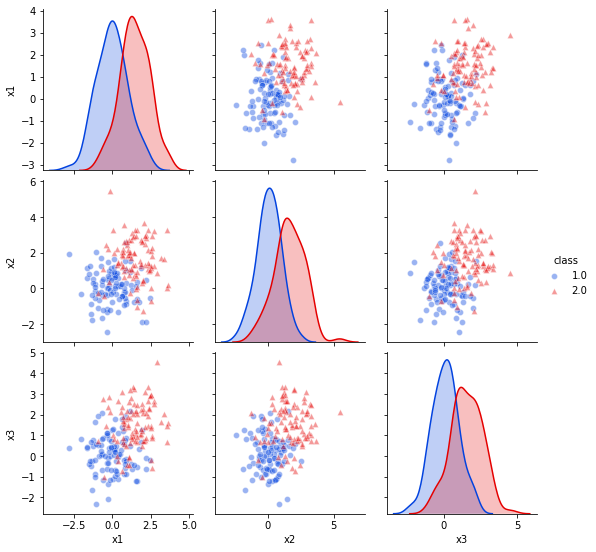

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   x3      200 non-null    float64
 3   class   200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df = pd.DataFrame(all_data)
df.columns = ['x1', 'x2','x3','class']
mycolors = ["blue","red"]
plt.figure(figsize=(16, 16))
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.4}, markers=['o','^'],
             hue = 'class', palette=sns.xkcd_palette(mycolors))
plt.show()

df.info()

In [6]:
#-------------------------------------
# compute the covariance matrix
#-------------------------------------
cov_mat = np.cov(all_samples.T)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.48858173 0.48726815 0.59894116]
 [0.48726815 1.70430466 0.5681851 ]
 [0.59894116 0.5681851  1.45874504]]


[0.7772151  0.91804372 1.        ]


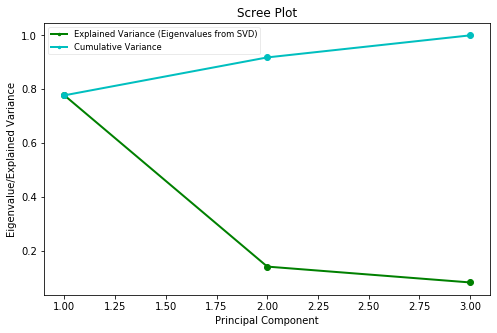

In [7]:
#-------------------------------------
# perform singular value decomposition
#-------------------------------------
u,s,v = np.linalg.svd(cov_mat)

#-------------------------------------
# compute eigenvalues
#-------------------------------------
num_vars = 3
num_obs = total_count
eigvals = s**2 / np.sum(s**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

#-------------------------------------
# make scree plot of variance explained per component
#-------------------------------------    
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
eig_cum = np.cumsum(eigvals)
print(eig_cum)
plt.plot(sing_vals, eigvals, 'go-', linewidth=2)
plt.plot(sing_vals, eig_cum, 'co-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue/Explained Variance')

#legend below, e.g. with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Explained Variance (Eigenvalues from SVD)','Cumulative Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
# leg.draggable(state=True)
plt.show()

Based on the Scree plot it looks like 2 components will explain over 90% of the variance

In [8]:
#-------------------------------------
# choose all the components
# generate the projection matrix
#-------------------------------------
componentCount = 3

matrix_w = u[:,0:componentCount]
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.54708095  0.57448763 -0.60882378]
 [-0.61693301 -0.76830201 -0.17060389]
 [-0.56577036  0.28226934  0.77474378]]


In [9]:
#-------------------------------------
# transform the data into the new basis with 3 dimensions
#-------------------------------------

transformed3 = all_samples.dot(matrix_w)


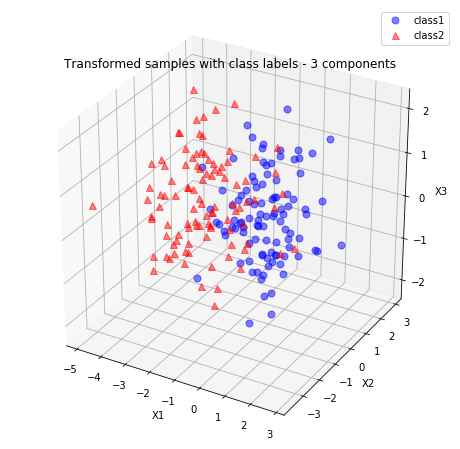

In [10]:
#-------------------------------------
# plot the newly transformed data
#-------------------------------------

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
plt.plot(transformed3[0:c1_count,0], transformed3[0:c1_count,1], transformed3[0:c1_count,2], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed3[c1_count:total_count,0], transformed3[c1_count:total_count,1], transformed3[c1_count:total_count,2], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2 - original feature space')
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('X3')
ax.legend(loc='upper right')
plt.title('Transformed samples with class labels - 3 components')

plt.show()

In [11]:
#-------------------------------------
# choose the components
# generate the projection matrix
#-------------------------------------
componentCount = 2

matrix_w = u[:,0:componentCount]
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.54708095  0.57448763]
 [-0.61693301 -0.76830201]
 [-0.56577036  0.28226934]]


In [12]:
#-------------------------------------
# transform the data into the new basis with 2 dimensions
#-------------------------------------

transformed2 = all_samples.dot(matrix_w)


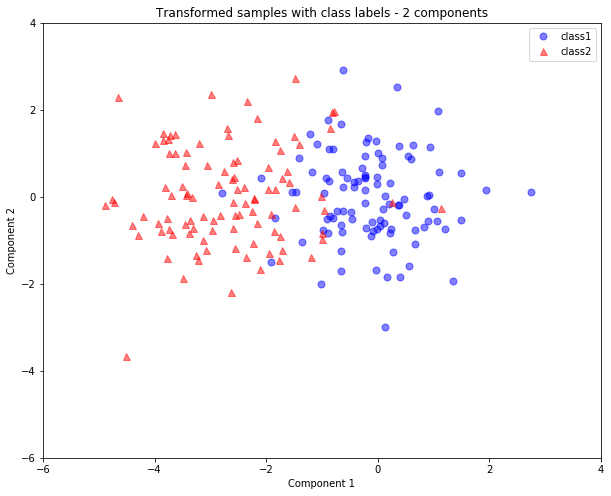

In [13]:
#-------------------------------------
# plot the newly transformed data
#-------------------------------------

plt.figure(figsize=(10, 8))
plt.plot(transformed2[0:c1_count,0], transformed2[0:c1_count,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed2[c1_count:total_count,0], transformed2[c1_count:total_count,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-6,4])
plt.ylim([-6,4])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('Transformed samples with class labels - 2 components')

plt.show()

Getting pretty good separation between classes with just 2 components

In [14]:
#-------------------------------------
# transform the data into the new basis with 1 dimension
#-------------------------------------

componentCount = 1

matrix_w1 = u[:,0:componentCount]
print('Matrix W(1):\n', matrix_w1)

transformed1 = all_samples.dot(matrix_w1)

#print("Transformed1: ", transformed1)


Matrix W(1):
 [[-0.54708095]
 [-0.61693301]
 [-0.56577036]]


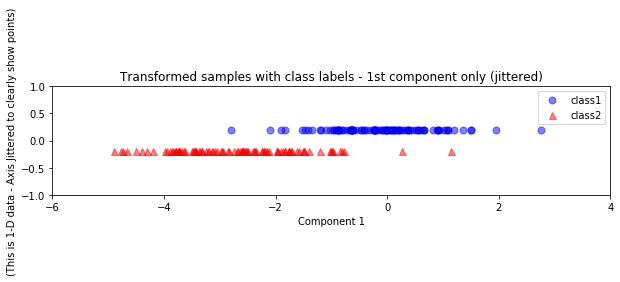

In [15]:
dim2 = np.zeros(transformed1.shape)
plt.figure(figsize=(10, 2))
plt.plot(transformed1[0:c1_count], dim2[0:c1_count]+0.2, 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed1[c1_count:total_count], dim2[c1_count:total_count]-0.2, '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-6,4])
plt.ylim([-1,1])
plt.xlabel('Component 1')
plt.ylabel('(This is 1-D data - Axis Jittered to clearly show points)')
plt.legend()
plt.title('Transformed samples with class labels - 1st component only (jittered)')

plt.show()

One component gives us just under 80% of the explained variance... may have more difficulty classifying with one component